<a href="https://colab.research.google.com/github/lulubeegum123/airbnb-nyc-data-analysis/blob/main/MY_EDA_CAPSTON_PROJECT_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.

This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.
Explore and analyze the data to discover key understandings (not limited to these) such as :

What can we learn about different hosts and areas?

What can we learn from predictions? (ex: locations, prices, reviews, etc)

Which hosts are the busiest and why?

Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [ ]:


#importing necessery libraries for future analysis of the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
airbnb=pd.read_csv("/content/drive/MyDrive/Airbnb NYC 2019.csv")
#examing head of Airbnb csv file 
airbnb.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


# New Section

In [ ]:
#checking amount of rows in given dataset to understand the size we are working with
airbnb.shape

(48895, 16)

In [ ]:
#checking type
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

#checking type
airbnb.dtypes### Data Cleaning

##### _Presenting the code and methods for acquiring the data. Loading the data into appropriate format for analysis. Explaining the process and results_

In [ ]:
#check null values
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
# drop 'id' & 'host_name' as these features are irrelevant for our prediction, we still have host_id as a reference if needed
# drop 'last_review' due to large amounts of missing values and this feature is less valuable for our predictions
airbnb.drop(['id','name','last_review'], axis=1, inplace=True)
airbnb.head(3)

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365


In [ ]:
# there are lots of missing values ~10,052 in reviews_per_month, but the feature may still have some valuable insights
# replacing all NaN values in 'reviews_per_month' with 0
airbnb.fillna({'reviews_per_month':0}, inplace=True)
airbnb.isnull().sum()

host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

### Exploring and Visualizing Data 1

#####  Explaining results

In [ ]:
#let's proceed with examing some interesting categorical unique values

#examining the unique values of n_group as this column will appear very handy for later analysis
airbnb.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
#examining the unique values of neighbourhood as this column will appear very handy for later analysis
len(airbnb.neighbourhood.unique())

221

In [ ]:
#examining the unique values of room_type as this column will appear very handy for later analysis
airbnb.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

### Exploring and Visualizing Data

##### Exploring the data by analyzing its statistics and visualizing the values of features and correlations between different features. Explaining the process and the results

Now that we are ready for an exploration of our data, we can make a rule that we are going to be working from left to right. The reason some may prefer to do this is due to its set approach - some datasets have a big number of attributes, plus this way we will remember to explore each column individually to make sure we learn as much as we can about our dataset.

In [ ]:
#we will skip first column for now and begin from host_id

#let's see what neighbourhood group have the most listings on Airbnb platform and taking advantage of this service
top_neighbour=airbnb.neighbourhood_group.value_counts().head(10)
top_neighbour

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [ ]:
#coming back to our dataset we can confirm our fidnings with already existing column called 'calculated_host_listings_count'
top_neighbour_check=airbnb.calculated_host_listings_count.max()
top_neighbour_check

327

In [ ]:
#setting figure size for future visualizations
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

In [ ]:
top_neighbour_df=pd.DataFrame(top_neighbour)
top_neighbour_df.reset_index(inplace=True)
top_neighbour_df.rename(columns={'index':'neighbourhood_group', 'neighbourhood_group':'P_count'}, inplace=True)
top_neighbour_df

,neighbourhood_group,P_count
0,Manhattan,21661
1,Brooklyn,20104
2,Queens,5666
3,Bronx,1091
4,Staten Island,373


[Text(0, 0, 'Manhattan'),
 Text(0, 0, 'Brooklyn'),
 Text(0, 0, 'Queens'),
 Text(0, 0, 'Bronx'),
 Text(0, 0, 'Staten Island')]

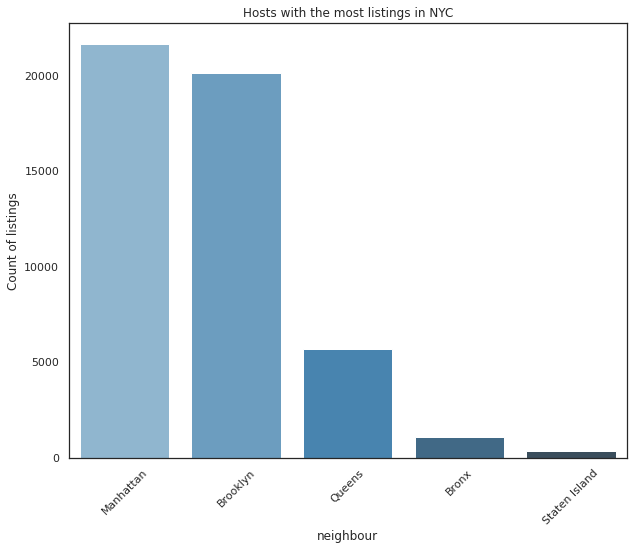

In [ ]:
viz_1=sns.barplot(x="neighbourhood_group", y="P_count", data=top_neighbour_df,palette='Blues_d')
viz_1.set_title('Hosts with the most listings in NYC')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('neighbour')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

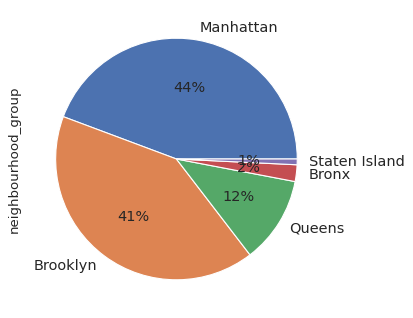

In [ ]:
# also we need a pie chart based on this data analysis
fig = plt.figure(figsize =(5,5),dpi=80)
airbnb['neighbourhood_group'].value_counts().plot(kind='pie',autopct = '%1.0f%%',startangle=360,fontsize=13)
plt.show()

Interesting, we can see that there is a good distribution between 5 neighbourhood groups with the most listings. First host has more than 300+ listings.

### Exploring and Visualizing Data 

#####  Explaining results

In [ ]:
#lets find some info of neighbourhood_group
airbnb['neighbourhood'].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

Now we have to filter price from zero price value. Lets check for any outliers in price column as its the most important column for our analysis for which we need to be cautious for our future analysis.

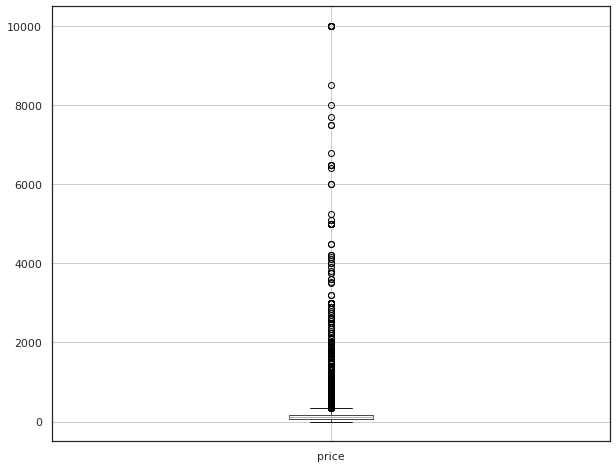

In [ ]:
# checking for any outliers in price.
airbnb.boxplot(column=['price'])
plt.show()

In [ ]:
# removing the price value as 0 ,which is not possible in practically. So droping rows with price as zero.
price_without_zero = airbnb[(airbnb['price'] > 0)]
price_without_zero.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48884 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48884 non-null  int64  
 1   host_name                       48863 non-null  object 
 2   neighbourhood_group             48884 non-null  object 
 3   neighbourhood                   48884 non-null  object 
 4   latitude                        48884 non-null  float64
 5   longitude                       48884 non-null  float64
 6   room_type                       48884 non-null  object 
 7   price                           48884 non-null  int64  
 8   minimum_nights                  48884 non-null  int64  
 9   number_of_reviews               48884 non-null  int64  
 10  reviews_per_month               48884 non-null  float64
 11  calculated_host_listings_count  48884 non-null  int64  
 12  availability_365                

In [ ]:
def remove_outlier(airbnb_in, col_name):
    q1 = airbnb_in[col_name].quantile(0.25)
    q3 = airbnb_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    airbnb_out = airbnb_in.loc[(airbnb_in[col_name] > fence_low) & (airbnb_in[col_name] < fence_high)]
    return airbnb_out

In [ ]:
price_without_outlier =remove_outlier(price_without_zero,'price')

In [ ]:
result = price_without_outlier.groupby('room_type').agg({'price':['mean','min','max',]})
result

price         
                       mean min  max
room_type                           
Entire home/apt  162.503731  10  333
Private room      79.043658  10  333
Shared room       59.397887  10  320

<function matplotlib.pyplot.show(*args, **kw)>

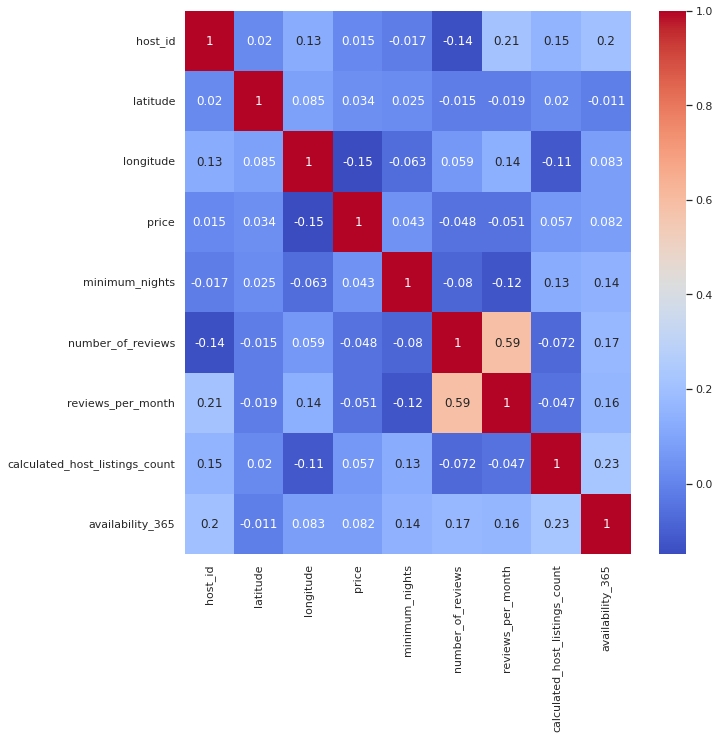

In [ ]:
# plot a correlation matrix to check for any feature associations
corr = airbnb.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True,cmap= "coolwarm")
plt.show

Text(0.5, 1.0, 'density and distribution of prices for each neighbourhood_group')

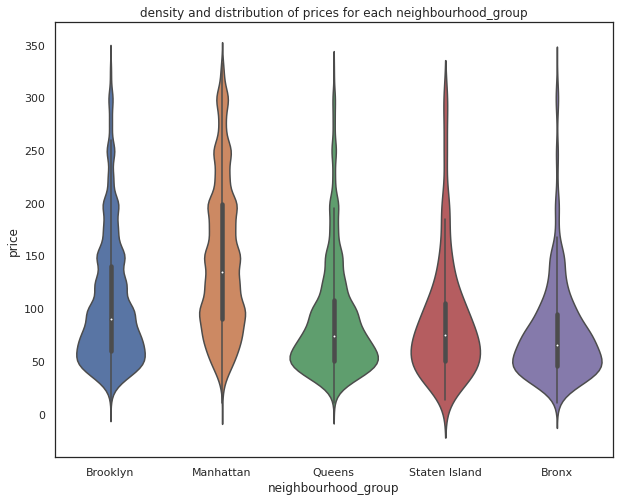

In [ ]:
fig=sns.violinplot(x='neighbourhood_group',y=price_without_outlier['price'],data=airbnb)
fig.set_title('density and distribution of prices for each neighbourhood_group')

Lets move to check which room type is more in Airbnb NYC 

In [ ]:
#now we have to find the types of rooms in the above places
airbnb.value_counts('room_type')

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
dtype: int64

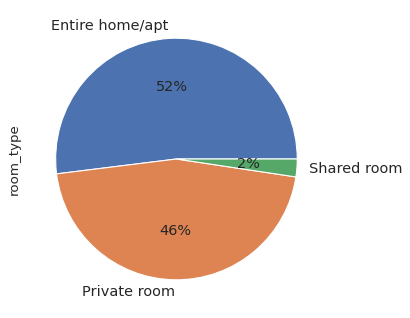

In [ ]:
fig = plt.figure(figsize =(5,5),dpi=80)
airbnb['room_type'].value_counts().plot(kind='pie',autopct = '%1.0f%%',startangle=360,fontsize=13)
plt.show()

In the above figure we have to find the percentage distribution in room types

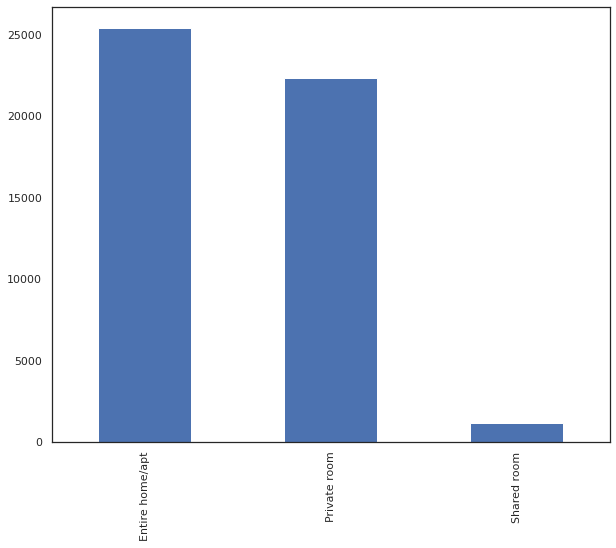

In [ ]:
pd.value_counts(airbnb['room_type']).plot(kind='bar')

In [ ]:
# lets check the relation between room_type and price
average_cost=airbnb.groupby(['room_type']).price.mean().reset_index()  #reset_index gives another column
average_cost 

,room_type,price
0,Entire home/apt,211.794246
1,Private room,89.780973
2,Shared room,70.127586


Text(0.5, 1.0, 'density and distribution of prices for each room_type')

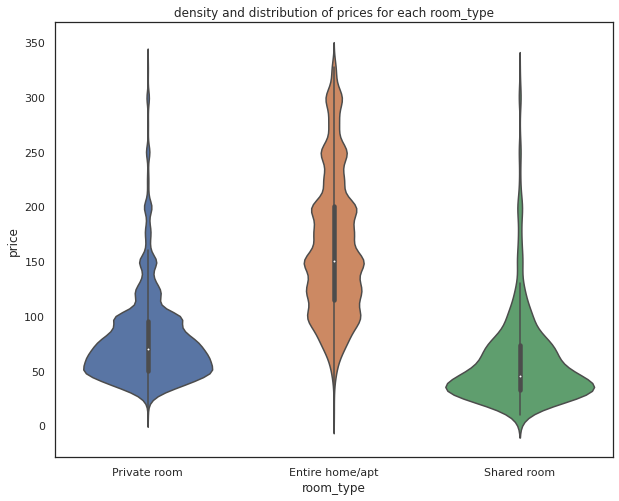

In [ ]:
fig=sns.violinplot(x='room_type',y=price_without_outlier['price'],data=airbnb)
fig.set_title('density and distribution of prices for each room_type')

In [ ]:
airbnb.groupby('neighbourhood_group').availability_365.value_counts()

neighbourhood_group  availability_365
Bronx                0                   177
                     365                  54
                     364                  22
                     89                   20
                     363                  17
                                        ... 
Staten Island        346                   1
                     347                   1
                     348                   1
                     357                   1
                     361                   1
Name: availability_365, Length: 1577, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

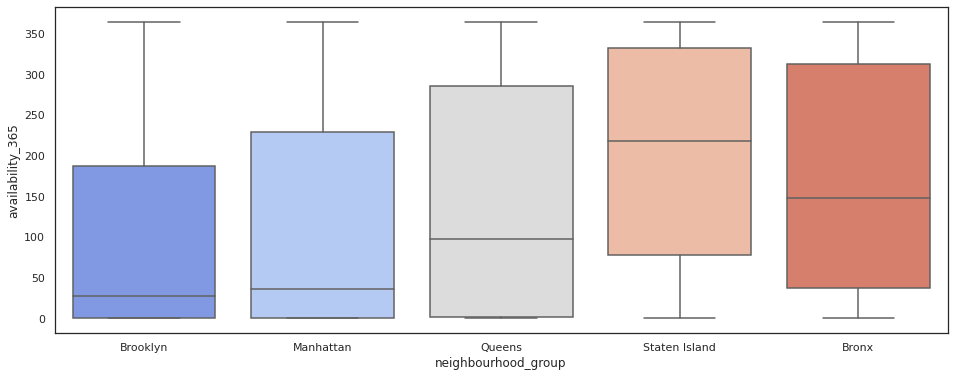

In [ ]:
# plot listing availability across the different neighbourhood groups using a boxplot
plt.figure(figsize=(16,6))
availability_365 = sns.boxplot(data=airbnb, x='neighbourhood_group',y='availability_365',palette='coolwarm')
plt.show

In [ ]:
airbnb.head(4)

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194


From the above observation we have  predictions (ex: reviews,price,location etc)

In [ ]:
#now we will create the relation between location and price
location_review=airbnb.groupby(['neighbourhood_group']).price.max().reset_index()  #reset_index gives another column
location_review

,neighbourhood_group,price
0,Bronx,2500
1,Brooklyn,10000
2,Manhattan,10000
3,Queens,10000
4,Staten Island,5000


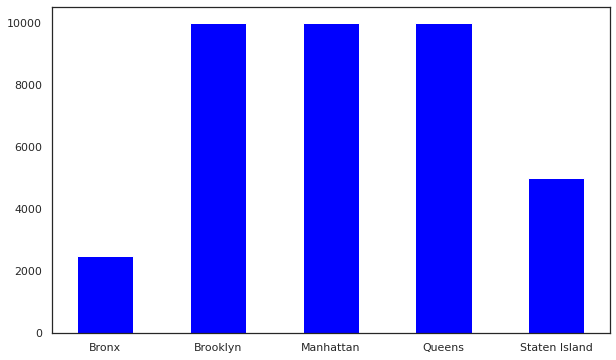

In [ ]:
#we have to visualize the relation on bar plot
location =location_review['neighbourhood_group'] 
price = location_review['price']

fig = plt.figure(figsize = (10, 6))
 
# Then we have to creating the bar plot
plt.bar(location,price,color ='blue',width = 0.5)

plt.show()
 

From the above figure we can says about the price of all areas

In [ ]:
#From this bar graph ,we will understand the relation between area and mean price. 
#Here We can see that the maximum price is in 'Manhattan'and least price is in 'Bronx'

In [ ]:
airbnb.head(4)

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194


In [ ]:
#now we will get relation between room_type and price
room_price =airbnb.groupby(['room_type']).price.max().reset_index()
room_price.head(3)

,room_type,price
0,Entire home/apt,10000
1,Private room,10000
2,Shared room,1800


In [ ]:
#now we have to analyse the relation using graph
room=room_price['room_type']
price=room_price['price']

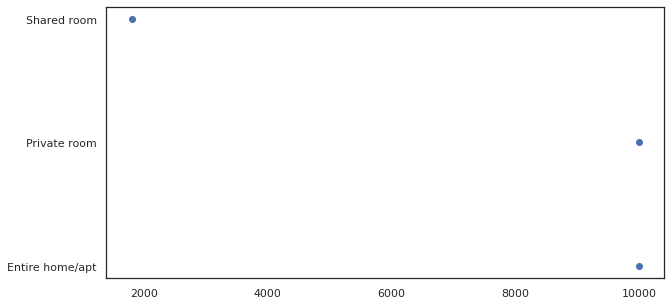

In [ ]:
fig=plt.figure(figsize=(10,5))
plt.scatter(price,room)
plt.xlabel='price'
plt.ylabel='room'
plt.title='Price vs room'

form the above graph we have to say that the private room and entire apartment is preferd in most 

In [ ]:
#now we will get realtion between price and no. of reviews
price_review =airbnb.groupby(['price']).number_of_reviews.max().reset_index()
price_review.head(10)

,price,number_of_reviews
0,0,95
1,10,93
2,11,113
3,12,8
4,13,9
5,15,19
6,16,43
7,18,1
8,19,76
9,20,116


In [ ]:
#draw this on graph
review=price_review['number_of_reviews']
price=price_review['price']

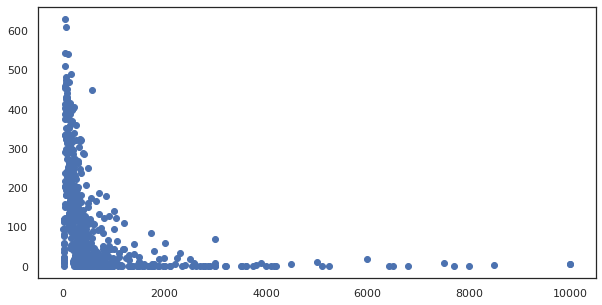

In [ ]:
fig=plt.figure(figsize=(10,5))
plt.scatter(price,review)
plt.xlabel='price'
plt.ylabel='review'
plt.title='Price vs number of reviews'

from this graph we conclude that the peoples are choosing the low price 

Now analyse Which hosts are the rush and why?

In [ ]:
airbnb.head(3)

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365


In [ ]:
busy_host=airbnb.groupby(['host_name','host_id','room_type']).number_of_reviews.max().reset_index()

In [ ]:
busy_host=busy_host.sort_values(by='number_of_reviews', ascending=False).head(10)

In [ ]:
busy_host

,host_name,host_id,room_type,number_of_reviews
10279,Dona,47621202,Private room,629
17708,Jj,4734398,Private room,607
25566,Maya,37312959,Private room,543
6235,Carol,2369681,Private room,540
8947,Danielle,26432133,Private room,510
3950,Asa,12949460,Entire home/apt,488
37748,Wanda,792159,Private room,480
22499,Linda,2680820,Private room,474
8625,Dani,42273,Entire home/apt,467
2942,Angela,23591164,Private room,466


<BarContainer object of 10 artists>

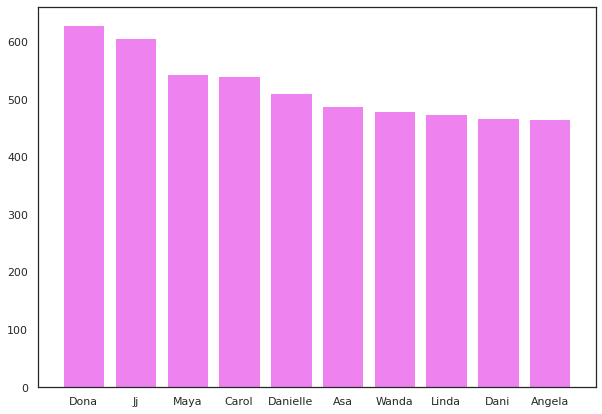

In [ ]:
name = busy_host['host_name']
reviews = busy_host['number_of_reviews']

fig=plt.figure(figsize=(10,7))

plt.bar(name,reviews, color='violet')

From above analysis we find top host like Dona, ji, Maya,Caro,Danielle and so on and top 5 booked private rooms

In [ ]:
Let's find out the traffic among different location and what could be the reason for it?

Object `it` not found.


In [ ]:
airbnb.head(3)

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365


In [ ]:
traffic_loc= airbnb.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
traffic_loc = traffic_loc.sort_values(by="minimum_nights",ascending=False)
traffic_loc

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13199
4,Brooklyn,Private room,10132
3,Brooklyn,Entire home/apt,9559
7,Manhattan,Private room,7982
10,Queens,Private room,3372
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,379


we have to shows the realation in graphically

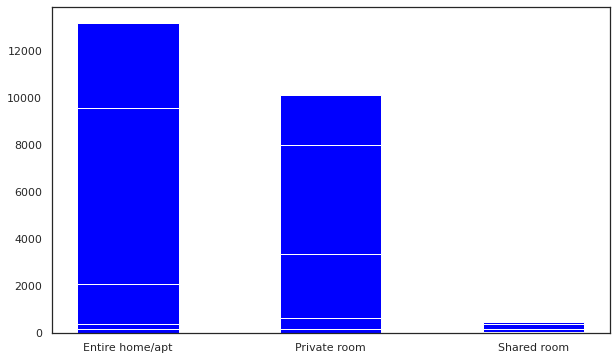

In [ ]:
room_type=traffic_loc['room_type']
room_stay=traffic_loc['minimum_nights']

fig = plt.figure(figsize=(10,6))
plt.bar(room_type,room_stay,color='blue',width = 0.5)
plt.show()

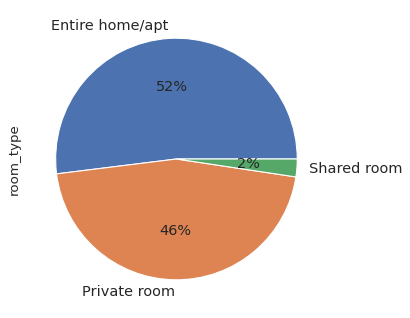

In [ ]:
fig = plt.figure(figsize =(5,5),dpi=80)
airbnb['room_type'].value_counts().plot(kind='pie',autopct = '%1.0f%%',startangle=360,fontsize=13)
plt.show()

from the above graph we have to says that the peoples are preferd more the entire room/apartement,the least is shared room and the private room is also in a good manner

now we have to find the more expensive and the least expensive room type

In [ ]:
airbnb.head(2)

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355


In [ ]:
airbnb.groupby(['neighbourhood_group','room_type']).price.min().reset_index()

,neighbourhood_group,room_type,price
0,Bronx,Entire home/apt,28
1,Bronx,Private room,0
2,Bronx,Shared room,20
3,Brooklyn,Entire home/apt,0
4,Brooklyn,Private room,0
5,Brooklyn,Shared room,0
6,Manhattan,Entire home/apt,0
7,Manhattan,Private room,10
8,Manhattan,Shared room,10
9,Queens,Entire home/apt,10


From the above analysis we have least expensive room types from each region

In [ ]:
airbnb.groupby(['neighbourhood_group','room_type']).price.max().reset_index()

,neighbourhood_group,room_type,price
0,Bronx,Entire home/apt,1000
1,Bronx,Private room,2500
2,Bronx,Shared room,800
3,Brooklyn,Entire home/apt,10000
4,Brooklyn,Private room,7500
5,Brooklyn,Shared room,725
6,Manhattan,Entire home/apt,10000
7,Manhattan,Private room,9999
8,Manhattan,Shared room,1000
9,Queens,Entire home/apt,2600


From the above analysis we have most expensive room types from each region

now we have to create the new file as my own file and named as 'lulus_airbnb.csv'

In [ ]:
airbnb.to_csv('lulus_airbnb.csv')

In [ ]:
pd.read_csv('lulus_airbnb.csv').head(3) # lets call our new file

,Unnamed: 0,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365


Text(0.5, 1.0, 'Highly Reviewed room_types in each Neighbourhood Groups')

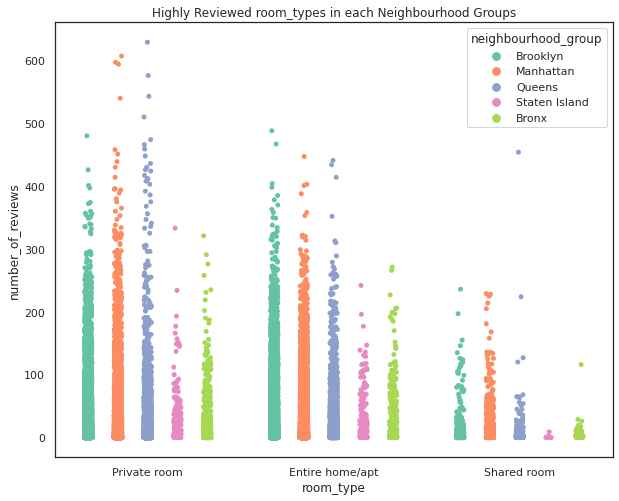

In [ ]:
f,ax = plt.subplots(figsize=(10,8))
ax= sns.stripplot(x='room_type',y='number_of_reviews',hue='neighbourhood_group',dodge=True,data=airbnb,palette='Set2')
ax.set_title('Highly Reviewed room_types in each Neighbourhood Groups')

> From the above graph its saw that the private room have the more reviiew 
> And the shared room have the least review
>Also notice that manhattan and the queens has the more no of reviews in all type of rooms

CONCLUSIONS

1. The people who prefer to stay in Entire home or Apartment they are going to stay bit longer in that particular Neighbourhood only.
2. The people who prefer to stay in Private room they won't stay longer as compared to Home or Apartment.
3. Most people prefer to pay less price.
4. If there are more number of Reviews for particular Neighbourhood group that means that place is a tourist place.
5. If people are not staying more then one night means they are travellers.
